# 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](https://nlp100.github.io/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

ターミナルで以下を実行

`brew install mecab`

`brew install mecab-ipadic`

`mecab < nlp100knockings2022/neko.txt > nlp100knockings2022/neko.txt.mecab`

## 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [1]:
#MeCabの公式ページによると、出力フォーマットは以下のようになるとあったので、これを参考にした。
#表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

lst = []
with open("neko.txt.mecab") as f:
    text = f.read().split('\n')
    
for line in text:
    if line != "EOS" and line != "":
        tmp = line.split("\t")
        if tmp[0] != "":
            morpheme = tmp[1].split(",")
            lst.append({"surface":tmp[0], "base":morpheme[6], "pos":morpheme[0], "pos1":morpheme[1]})

## 31. 動詞
動詞の表層形をすべて抽出せよ

In [2]:
ans = list(set(line["surface"] for line in lst if line["pos"] == "動詞"))
print(", ".join(ans[:10]))

答え, 食わせれ, おっしゃろ, 通そ, きら, 振っ, いろ, 表わし, 振り返る, 酔っ払っ


## 32. 動詞の基本形

動詞の基本形をすべて抽出せよ．

In [3]:
ans = list(set(line["base"] for line in lst if line["pos"] == "動詞"))
print(", ".join(ans[:10]))

振り返る, もらう, 待つ, 汚す, 浴びせる, 訪う, あばく, 打殺す, 溶かす, 清める


## 33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [4]:
ans = set()
for i in range(len(lst)):
    if lst[i-1]["pos"] == "名詞" and lst[i]["surface"] == "の" and \
    lst[i+1]["pos"] == "名詞":
        ans.add(lst[i-1]["surface"] + lst[i]["surface"] + lst[i+1]["surface"])
print(", ".join(list(ans)[:10]))

飯櫃の上, 子の声, 金剛不壊のからだ, 時機の一, 大抵の釘, 本堂の裏手, 作中の人物, んの泣き声, 本の尾, 尻の中


## 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ

In [5]:
ans = set()
tmp = []
before = False

for line in lst:
    if line["pos"] == "名詞":
        before = True
        tmp.append(line["surface"])
    elif before:
        if len(tmp) > 1:
            ans.add("".join(tmp))
        tmp = []
        before = False
    
print(", ".join(list(ans)[:10]))

男一人, 三方面共, 野猪的本領, 二行, 滑稽文, 寒月君自身, 二足, 代り十文半, いつか参上, 彼等人類


##  35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [6]:
import collections

c = collections.Counter([line["surface"] for line in lst if line["pos"] != "記号"])
print(c.most_common(10))

[('の', 9194), ('て', 6868), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337), ('た', 3988), ('で', 3806), ('も', 2479)]


##  36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

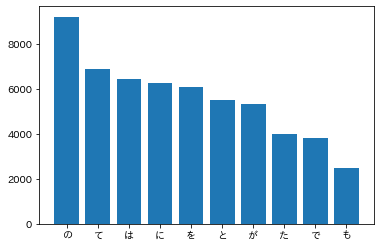

In [7]:
import matplotlib.pyplot as plt
import japanize_matplotlib

target = list(zip(*c.most_common(10)))
plt.bar(*target)
plt.show()

##  37. 「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

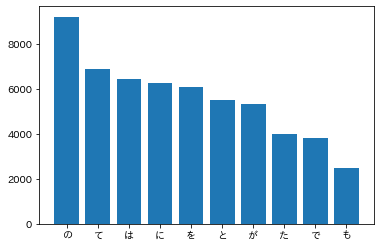

In [8]:
#共起回数　＝　「猫」が同じ文に現れる回数

tmp_cooccurrence = []
cooccurrence = []
isinCat = False

for line in lst:
    if line["surface"] == "。":
        if isinCat:
            cooccurrence.extend(tmp)
        tmp = []
        inCat = False
    else:
        if line["surface"] == "猫":
            isinCat = True
        elif line["pos"] != "記号":
            tmp.append(line["surface"])

c = collections.Counter(cooccurrence)
target = list(zip(*c.most_common(10)))
plt.bar(*target)
plt.show()

## 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

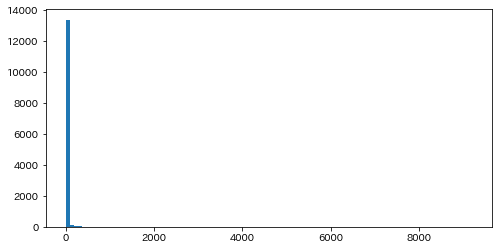

In [9]:
c = collections.Counter([line["surface"] for line in lst])
plt.figure(figsize=(8, 4))
plt.hist(c.values(), bins=100)
plt.show()

##  39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

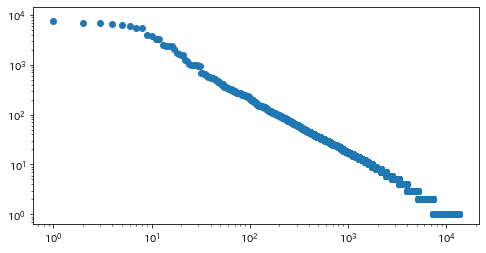

In [10]:
plt.figure(figsize=(8, 4))
plt.scatter(list(range(len(c))), [count for _, count in c.most_common()])
plt.xscale('log')
plt.yscale('log')